In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("tennis.csv")
dataset

,outlook,temp,humidity,windy,PlayTennis
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
cols = dataset.columns.tolist()[:-1]
print(cols)
data = pd.get_dummies(dataset, columns=cols)

['outlook', 'temp', 'humidity', 'windy']


In [4]:
X = data.drop('PlayTennis', axis=1)
X

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [5]:
y = data['PlayTennis']
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: PlayTennis, dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
df = DecisionTreeClassifier()
df.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.875, 'humidity_normal <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]\nclass = no'),
 Text(0.3, 0.625, 'outlook_sunny <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = yes'),
 Text(0.2, 0.375, 'windy_True <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = no'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = no'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = yes'),
 Text(0.7, 0.625, 'outlook_rainy <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = no'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = no'),
 Text(0.8, 0.375, 'windy_False <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no')]

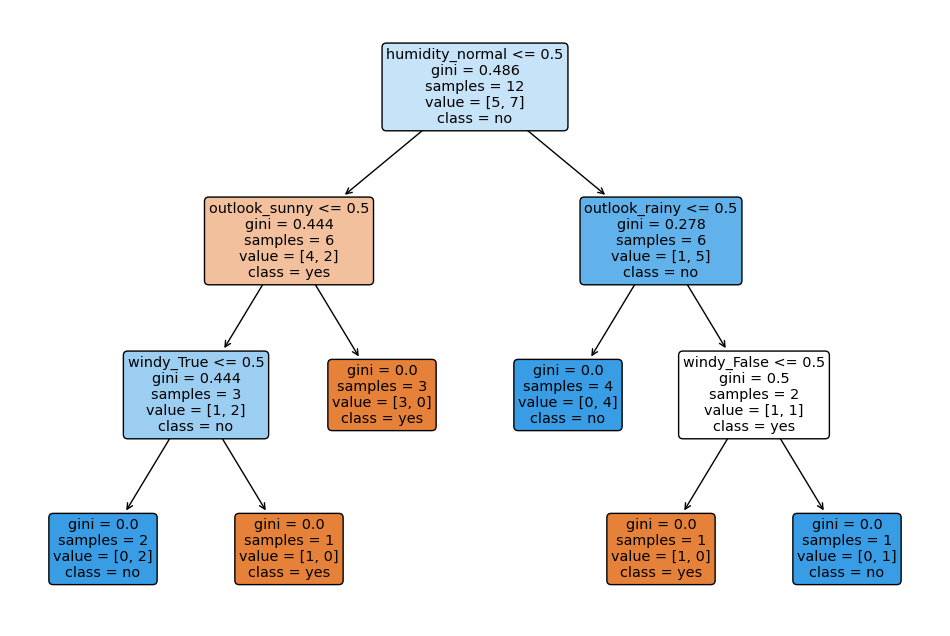

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(df, filled=True, feature_names=X.columns.tolist(), class_names=['yes', 'no'], rounded=True)